# PROJECT-2: Kyphosis (Kamburluk) Exploratory Data Analysis

- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Kyphosis disease Dataset. 
- Kyphosis is an abnormally excessive convex curvature of the spine. 
- Dataset contains 81 rows and 4 columns representing data on children who have had corrective spinal surgery. 
    - INPUTS: 1. Age: in months, 2. Number: the number of vertebrae involved, 3. Start: the number of the first (topmost) vertebra operated on.
    - OUTPUTS: Kyphosis which represents a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
- Using the “kyphosis.csv" included in the course package, write a python script to perform the following tasks:
    1. Import the “kyphosis.csv" file using Pandas
    2. Perform basic Exploratory Data Analysis (EDA) on the data       
    3. List the average, minimum and maximum age (in years) considered in this study using 2 methods
    4. Plot the correlation matrix 
    5. Convert the age column datatype from int64 to float64
    6. Define a function that converts age from months to years 
    7. Apply the function to the “Age” column and add the results into a new column entitled “Age in Years” 
    8. What are the features of the oldest and youngest child in this study?
    9. Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.    
    10. Normalization is conducted on the 'Age' column to make feature values range from 0 to 1.

## Import dependencies

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [40]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Initial Observations

In [41]:
df.shape

(81, 4)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [43]:
df.isnull().any().any()

False

## List the average, minimum and maximum age (in years) considered in this study using 2 methods

In [44]:
df['Age'].describe().loc[['mean', 'min', 'max']].div(12).astype('int')

mean     6
min      0
max     17
Name: Age, dtype: int32

As we see above, the average of 81 patiences is 6 years  
the ages are varying from 0 to 17

In [45]:
# we can check these values by pandas dataframe manipulation as well

print(f"As we see above, the average of {df['Age'].count()} patiences is  {int(df['Age'].mean()/12)} \n"
      f"the ages are varying from {int(df['Age'].min()/12)} to {int(df['Age'].max()/12)}   ")

As we see above, the average of 81 patiences is  6 
the ages are varying from 0 to 17   


## Plotting the correlation matrix

In [46]:
corr_matrix = df.corr()
corr_matrix

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


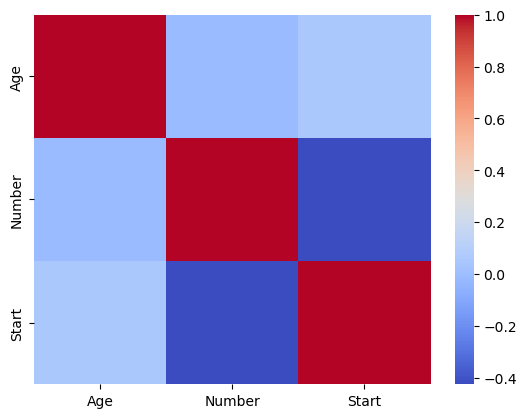

In [47]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

## Convert the age column datatype from int64 to float64

In [48]:
df['Age'] = df['Age'].astype('float64')
df['Age']

0      71.0
1     158.0
2     128.0
3       2.0
4       1.0
      ...  
76    157.0
77     26.0
78    120.0
79     42.0
80     36.0
Name: Age, Length: 81, dtype: float64

## Define a function that converts age from months to years

In [49]:
def month_to_year(months):
    year = round(months/12, 1)
    return year

## Apply the function to the “Age” column and add the results into a new column entitled “Age in Years”

In [50]:
df['Age_in_years'] = df['Age'].apply(month_to_year)

In [51]:
df.head(3)

,Kyphosis,Age,Number,Start,Age_in_years
0,absent,71.0,3,5,5.9
1,absent,158.0,3,14,13.2
2,present,128.0,4,5,10.7


## What are the features of the oldest and youngest child in this study?

In [57]:
df.loc[df['Age'].isin([df['Age'].min(), df['Age'].max()])]

,Kyphosis,Age,Number,Start,Age_in_years
4,absent,1.0,4,15,0.1
5,absent,1.0,2,16,0.1
13,absent,1.0,4,12,0.1
15,absent,1.0,3,16,0.1
36,absent,1.0,3,9,0.1
73,absent,206.0,4,10,17.2


## Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [60]:
minmax_scaler = MinMaxScaler()
std_scaler    = StandardScaler()

**both methods ask for a 2d input**

In [74]:
age_2d = df['Age'].values.reshape(-1,1)

In [75]:
df['Age_std'] = std_scaler.fit_transform(age_2d)
df.head()

,Kyphosis,Age,Number,Start,Age_in_years,Age_std,Age_norm
0,absent,71.0,3,5,5.9,-0.219143,0.341463
1,absent,158.0,3,14,13.2,1.287494,0.765854
2,present,128.0,4,5,10.7,0.767964,0.619512
3,absent,2.0,5,1,0.2,-1.414063,0.004878
4,absent,1.0,4,15,0.1,-1.431381,0.000000


In [76]:
df['Age_std'].mean()

1.0005713678720547e-16

In [77]:
df['Age_std'].std()

1.0062305898749055

In [78]:
df['Age_norm'] = minmax_scaler.fit_transform(age_2d)
df['Age_norm'].describe().T

count    81.000000
mean      0.403192
std       0.283435
min       0.000000
25%       0.121951
50%       0.419512
75%       0.629268
max       1.000000
Name: Age_norm, dtype: float64